In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
import numpy as np
import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis/math.sqrt(np.dot(axis, axis))
    a = math.cos(theta/2.0)
    b, c, d = -axis*math.sin(theta/2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d
    return np.array([[aa+bb-cc-dd, 2*(bc+ad), 2*(bd-ac)],
                     [2*(bc-ad), aa+cc-bb-dd, 2*(cd+ab)],
                     [2*(bd+ac), 2*(cd-ab), aa+dd-bb-cc]])

In [18]:
X = np.arange(0, 0.6, 0.002)
Y = np.arange(-0.1, 0.2, 0.002)
X, Y = np.meshgrid(X, Y)

coef_a_avg_sd = 4.709576 
coef_max_rel_sd = 6.458636 
intercept = -2.575427

mid_a_avg_sd = 0.225683
mid_max_rel_sd = 0.025436

rot_pts = [mid_a_avg_sd, 
           mid_max_rel_sd, 
           coef_a_avg_sd*mid_a_avg_sd + coef_max_rel_sd*mid_max_rel_sd + intercept]

n = [coef_a_avg_sd, coef_max_rel_sd, -1]

def Z_eqn(n, pts):
    return (- n[0]*X - n[1]*Y + n[0]*rot_pts[0] + n[1]*rot_pts[1] + n[2]*rot_pts[2] ) / n[2]

def get_C(n, pts):
    return pts[2] - n[0]*pts[0] - n[1]*pts[1]

def plot_base_plane(rot=0, title=False):
    nn = np.dot(rotation_matrix([0,0,1], np.pi/180 * rot),n)
    cc = get_C(nn, rot_pts)
    surf = ax.plot_surface(X, Y, Z_eqn(nn, rot_pts), cmap=cm.BrBG, linewidth=0, antialiased=True)
    if title:
        t="$t="
        if nn[0] > 0.1 or nn[0] < -0.1:
            t+="%0.1fh_2" % nn[0]
        if nn[1] > 0.1:
            t+="+%0.1fh_3" % nn[1]
        if nn[1] < -0.1:
            t+="%0.1fh_3" % nn[1]
        if cc > 0.1:
            t+="+%0.1f$" % cc
        if cc < -0.1:
            t+="%0.1f$" % cc
        
        plt.title(t)
    
    
def labels(z):
    ax.set_xlabel('h_2')
    ax.set_ylabel('h_3')
    ax.set_zlabel(z)

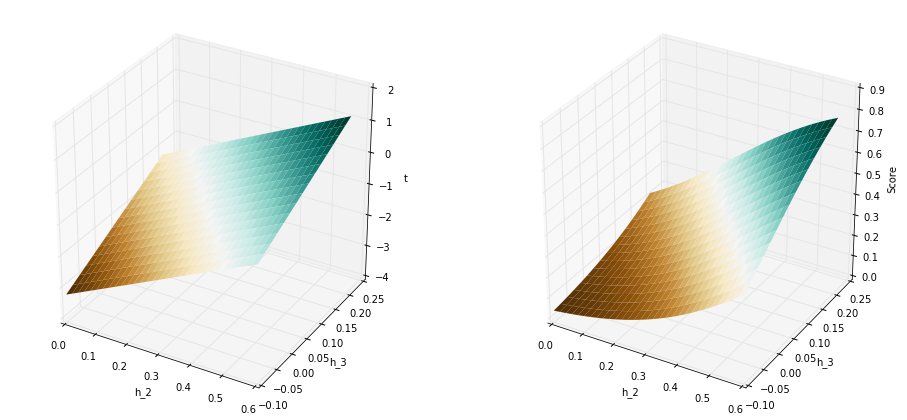

In [19]:

t = coef_a_avg_sd*X + coef_max_rel_sd*Y + intercept
Z = 1 / ( 1 + np.exp(-t) )

fig = plt.figure(figsize=(16,16))

ax = plt.subplot(221, projection='3d')

# Zl = np.linspace(-4,2)
# Xl = [mid_a_avg_sd for _ in range(len(Zl))]
# Yl = [mid_max_rel_sd for _ in range(len(Zl))]
# ax.plot(Xl, Yl, Zl)

# ax.plot([rot_pts[0]], [rot_pts[1]], [rot_pts[2]], 
#         markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5)

# surf = ax.plot_surface(X, Y, t, cmap=cm.BrBG, linewidth=0, antialiased=True, alpha=1)
plot_base_plane()
labels('t')

ax = plt.subplot(222, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.BrBG, linewidth=0, antialiased=True)
labels('Score')

# # t2 = (-n[0]*X - n[1]*Y + n[0]*rot_pts[0] + n[1]*rot_pts[1] + n[2]*rot_pts[2])/-1

# ax = plt.subplot(223, projection='3d')
# surf = ax.plot_surface(X, Y, Z_eqn(np.dot(rotation_matrix([0,0,1], np.pi/180 * -19),n), rot_pts), 
#                        cmap=cm.BrBG, linewidth=0.5, antialiased=True)
# ax.set_xlabel('a_avg_sd')
# ax.set_ylabel('max_rel_sd')
# ax.set_zlabel('t')

# ax.plot([rot_pts[0]], [rot_pts[1]], [rot_pts[2]], 
#         markerfacecolor='k', markeredgecolor='k', marker='o', markersize=10)

plt.show()

In [5]:
coef_a_avg_sd = 4.709576 
coef_max_rel_sd = 6.458636 
intercept = -2.575427

mid_a_avg_sd = 0.225683
mid_max_rel_sd = 0.025436

rot_pts = [mid_a_avg_sd, 
           mid_max_rel_sd, 
           coef_a_avg_sd*mid_a_avg_sd + coef_max_rel_sd*mid_max_rel_sd + intercept]

n = [coef_a_avg_sd, coef_max_rel_sd, -1]

In [9]:
step=5
for i in [-54, -53, -52, -51, -50, 36]:    
    nn = np.dot(rotation_matrix([0,0,1], np.pi/180 * i),n)
    cc = get_C(nn, rot_pts)
    
    
    
    print("./grappe.sh "
          "/home/sagag2/gecode-5.0.0-extension/build/latinsquare " 
          "0 39 "
          "MINREG/%s "
          "%f %f %f"
          % ("rot_" + str(i), nn[0], nn[1], cc))
    
    print("sleep 300")
    
    
#     print("%i: %s" % (i, np.dot(rotation_matrix([0,0,1], np.pi/180 * i),n)))

./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_-54 7.993366 -0.013836 -3.151889
sleep 300
./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_-53 7.992390 0.125670 -3.155217
sleep 300
./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_-52 7.988979 0.265137 -3.157995
sleep 300
./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_-51 7.983135 0.404523 -3.160221
sleep 300
./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_-50 7.974859 0.543787 -3.161896
sleep 300
./grappe.sh /home/sagag2/gecode-5.0.0-extension/build/latinsquare 0 39 MINREG/rot_36 0.013836 7.993366 -1.554716
sleep 300


In [71]:
np.dot(rotation_matrix([0,0,1], np.pi/180 * -53.9),n)

array([ 7.99338,  0.00012, -1.     ])

In [74]:
np.dot(rotation_matrix([0,0,1], np.pi/180 * 36.1),n)

array([-0.00012,  7.99338, -1.     ])

90

In [28]:
xx = [x for x in range(-54,37)]
yy = [29,24,24,25,25,26,26,25,26,28,27,27,29,26,29,29,31,30,28,30,28,29,32,31,30,33,33,32,31,30,33,35,33,33,
      34,34,31,30,33,29,31,32,30,31,29,30,30,32,34,33,29,30,32,31,34,37,34,30,30,29,33,37,32,36,33,32,36,27,
      35,32,32,31,35,31,32,39,35,38,34,31,30,33,33,32,31,32,30,24,28,25,26]

yy2=[12775.6,10301.3,10583.9,18150,21682,22120,18311.8,15934.4,13140,11118.7,12560.8,11162.1,11864.8,19904.2,
     22521.4,22045.1,17069.4,20966.8,15505.5,14700.9,17005.4,15251.1,15892.3,17209.8,9264.73,14254.6,17258.3,
     18571.9,11775.7,15362.3,16068.7,12112.5,16150.6,15239.3,11196,11010.4,15699.6,13071.2,10437.8,13553,15848.3,
     8945.37,7390.12,9963.65,18296.2,19914.2,16129.3,13173.8,14172.8,17177.6,12738.4,11856.1,13547.2,9948.53,13213.9,
     18554,17405.7,15636.4,15368.4,12127.5,14133.5,16556,11076.5,14474.2,15448.3,20786.9,16485.7,10707.6,6874.71,
     13406.1,13092.2,15874.5,16917.6,15645.4,19462.5,20068.8,18738.1,14443.8,15166.1,19446.7,19955.9,17423.4,19001.7,
     14224,13450.8]



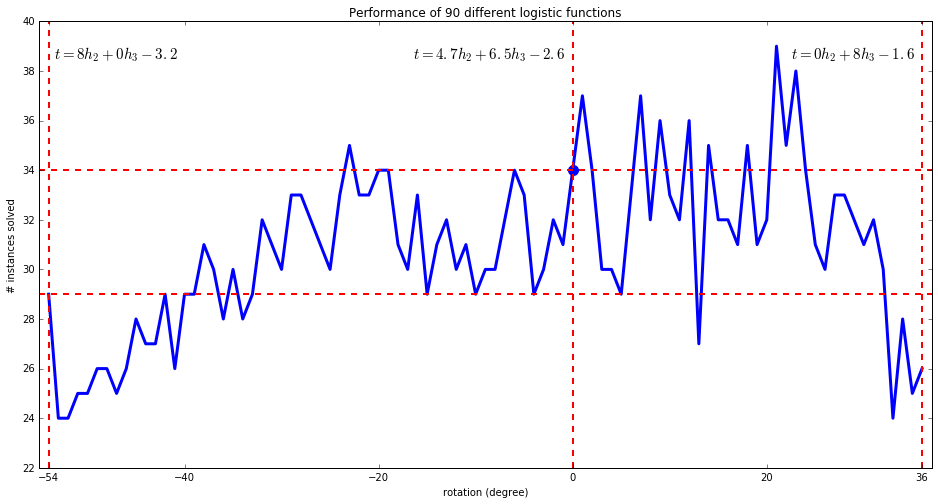

In [71]:
fig = plt.figure(figsize=(16,8))

plt.scatter(0, 34, color='blue', s=100, marker='o')
plt.plot(xx,yy, linewidth=3)

plt.axvline(x=0, color='red', linewidth=2, linestyle='--')
plt.gca().text(-16.5, 38.5, '$t=4.7h_2+6.5h_3-2.6$', fontsize=15)
# plt.axhline(y=34, color='red', linewidth=2)
# plt.axhline(y=29, color='red', linewidth=2, linestyle='--')

plt.axvline(x=-54, color='red', linewidth=2, linestyle='--')
plt.gca().text(-53.5, 38.5, '$t=8h_2+0h_3-3.2$', fontsize=15)



plt.axvline(x=36, color='red', linewidth=2, linestyle='--')
plt.gca().text(22.5, 38.5, '$t=0h_2+8h_3-1.6$', fontsize=15)

plt.ylabel('# instances solved')
plt.xlabel('rotation (degree)')

x_ticks = np.append(plt.gca().get_xticks(), -54)
x_ticks = np.append(x_ticks, 36)

plt.gca().set_xticks(x_ticks)

plt.xlim(-55,37)
plt.title('Performance of 90 different logistic functions')


plt.axhline(y=29, color='red', linewidth=2, linestyle='--')
plt.axhline(y=34, color='red', linewidth=2, linestyle='--')

In [31]:
z = np.linspace(-2, 2, 100)

In [30]:
z


array([-2])

In [35]:
Xl

[]

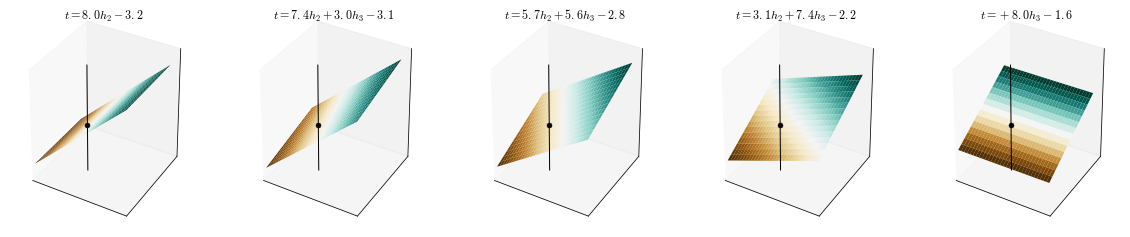

In [8]:
def line_mid_pts():
    Zl = np.linspace(-4,2)
    Xl = [mid_a_avg_sd for _ in range(len(Zl))]
    Yl = [mid_max_rel_sd for _ in range(len(Zl))]
    ax.plot(Xl, Yl, Zl, color='black')
    
    ax.plot([rot_pts[0]], [rot_pts[1]], [rot_pts[2]], 
        markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5)

def hide_ticks():
    line_mid_pts()
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_zticks([])

fig = plt.figure(figsize=(20,4))

for i in range(0,5):
    deg = -54+i*90/4
    ax = plt.subplot(1,5,i+1, projection='3d')
    plot_base_plane(deg, title=True)
    hide_ticks()




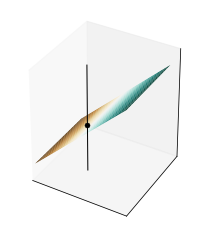

In [61]:

fig = plt.figure(figsize=(20,4))
ax = plt.subplot(1,5,i+1, projection='3d')
plot_base_plane(-54, title=False)
hide_ticks()

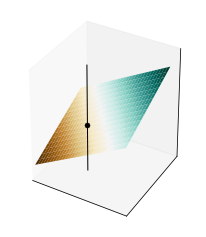

In [62]:
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(1,5,i+1, projection='3d')
plot_base_plane(0, title=False)
hide_ticks()

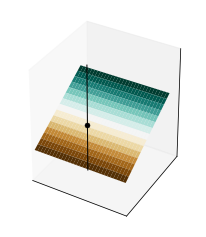

In [63]:
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(1,5,1, projection='3d')
plot_base_plane(36, title=False)
hide_ticks()